In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Sale Order History 09-09-2020.xlsx')

In [3]:
df.head()

,Name,Sale Org,plant,Territory,indent_no,So_No,SO_DATE,Sale Order Qty,Sale Order Amount,BILL_DATE,BILL_NO,Bill_Qty,Bill_Amt,Delivery_no,Status,Approval_date,Sale Order Pending Qty,Sale Order Pending Amount,Sale Order Cancel Qty,Sale Order Cancel Amount
0,Garg Medical Agency,1100,1001,Punjab,IND2021000003,3000002307,2020-07-01,NaN,NaN,2020-07-13,1.001102e+09,538,28158.0,8.000005e+09,PARTIAL SO CANCELLED,2020-07-09,NaN,NaN,NaN,NaN
1,Garg Medical Agency,1100,1001,Punjab,IND2021000003,3000002307,2020-07-01,1317.0,210906.0,2020-07-11,1.001102e+09,755,172572.0,8.000005e+09,PARTIAL SO CANCELLED,2020-07-09,NaN,NaN,24.0,10176.0
2,Partap Surgical,1100,1001,Punjab,IND2021000002,3000002308,2020-07-01,NaN,NaN,2020-07-11,1.001102e+09,106,17368.0,8.000005e+09,PARTIAL SO CANCELLED,2020-07-01,NaN,NaN,NaN,NaN
3,Partap Surgical,1100,1001,Punjab,IND2021000002,3000002308,2020-07-01,269.0,48091.0,2020-07-04,1.001102e+09,106,24708.0,8.000004e+09,PARTIAL SO CANCELLED,2020-07-01,NaN,NaN,57.0,6015.0
4,R.K. Medical Hall,1100,1001,Punjab,IND2021000005,3000002309,2020-07-01,201.0,47100.0,2020-07-09,1.001102e+09,201,47100.0,8.000005e+09,INVOICED,2020-07-07,0.0,0.0,NaN,NaN


In [4]:
sales = df[['BILL_DATE','Bill_Amt']]

In [5]:
sales.isnull().sum()

BILL_DATE    379
Bill_Amt       0
dtype: int64

In [6]:
sales.dropna(inplace=True)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
sales.columns = ['Month','Sales']

In [8]:
sales.set_index('Month',inplace=True)

In [9]:
sales.size

6860

In [10]:
sales_mean = sales.resample('D').sum()

In [11]:
sales_mean.shape

(70, 1)

In [12]:
sales_mean.dropna(inplace=True)

In [13]:
sales_mean[:60]

,Sales
Month,
2020-07-01,22288.00
2020-07-02,563389.00
2020-07-03,2355410.00
2020-07-04,3220288.00
2020-07-05,0.00
2020-07-06,2624017.00
2020-07-07,998021.00
2020-07-08,4949700.00
2020-07-09,2708051.00


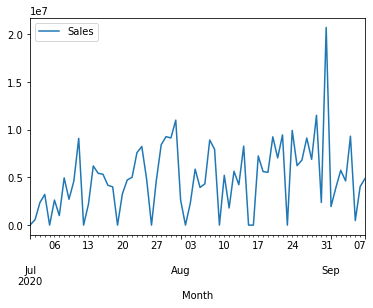

In [14]:
sales_mean.plot()

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

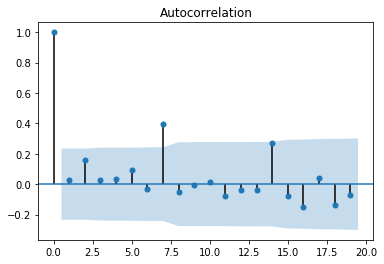

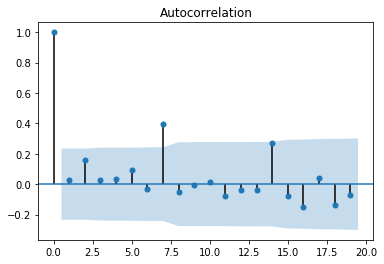

In [16]:
plot_acf(sales_mean['Sales'])

In [17]:
sales_diff = sales_mean.diff(periods=1)

In [18]:
sales_diff = sales_diff[1:]

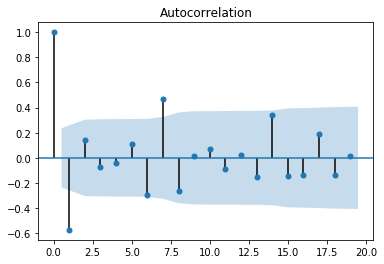

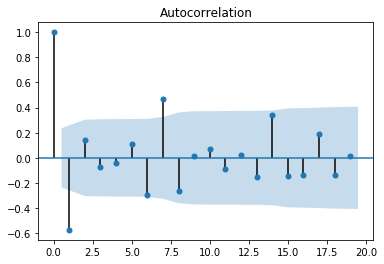

In [19]:
plot_acf(sales_diff)

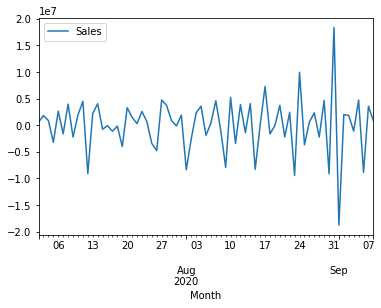

In [20]:
sales_diff.plot()

In [21]:
X = sales_mean.values

In [22]:
train = X[:55]
test = X[55:]

In [23]:
train.size

55

In [24]:
test.size

15

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model_arima = ARIMA(train,order=(9,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1772.9180146975236


In [27]:
predictions = model_arima_fit.forecast(steps=15)[0]

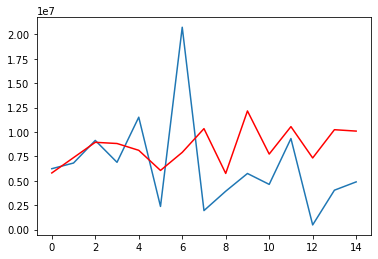

In [28]:
plt.plot(test)
plt.plot(predictions,'r')

In [29]:
import statsmodels.api as sm

In [30]:
model = sm.tsa.statespace.SARIMAX(sales_mean['Sales'],order=(9,0,1),seasonal_order=(8,1,1,12)) #911 80112, #901 81112
result = model.fit()

F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


In [31]:
sales_mean['forecast'] = result.predict(start=55,end=70,dynamic=True)

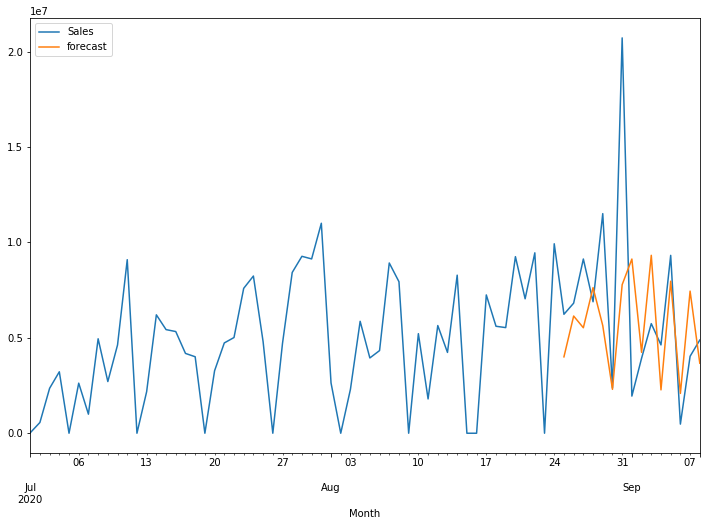

In [32]:
sales_mean[['Sales','forecast']].plot(figsize=(12,8))

In [33]:
from pandas.tseries.offsets import DateOffset

In [34]:
future_dates = [sales_mean.index[-1] + DateOffset(days=x) for x in range(0,60)]

In [35]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=sales_mean.columns)

In [36]:
future_df = pd.concat([sales_mean,future_dates_df])

In [37]:
future_df['forecast'] = result.predict(start=67,end=130,dynamic=True)

In [38]:
a = result.predict(start=67,end=130,dynamic=True)

In [39]:
a.shape

(64,)

In [40]:
future_df['forecast'].shape

(129,)

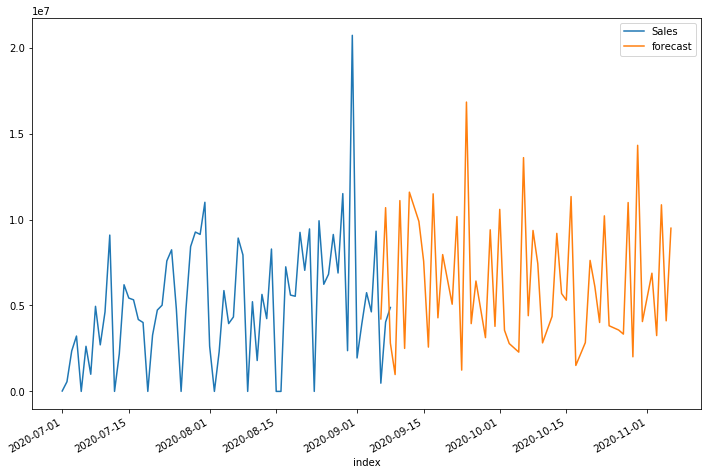

In [65]:
future_df[['Sales','forecast']].plot(figsize=(12,8))

In [42]:
X.sum()

348510641.86

In [43]:
a.sum()

435276833.0612701

In [44]:
y = future_df

In [45]:
y.reset_index(inplace=True)

In [46]:
y.drop(74,axis=0,inplace=True)
y.drop(81,axis=0,inplace=True)
y.drop(88,axis=0,inplace=True)
y.drop(95,axis=0,inplace=True)
y.drop(102,axis=0,inplace=True)
y.drop(109,axis=0,inplace=True)
y.drop(116,axis=0,inplace=True)
y.drop(123,axis=0,inplace=True)

In [47]:
y.set_index('index',inplace=True)

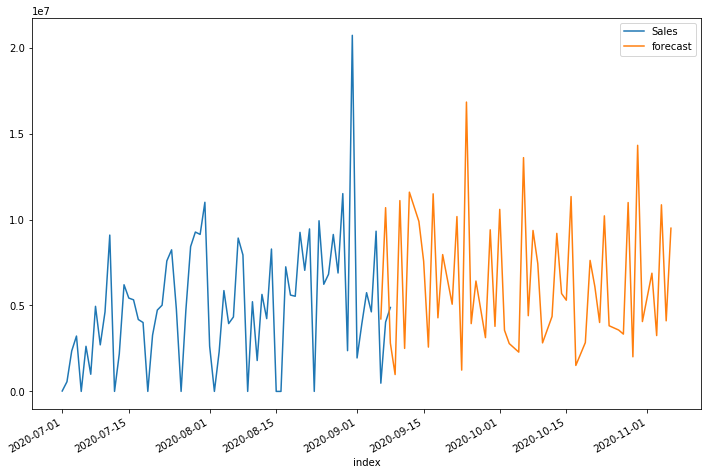

In [48]:
y[['Sales','forecast']].plot(figsize=(12,8))

In [49]:
n = y['forecast']

In [50]:
X.sum()

348510641.86

In [51]:
n.sum()

349401236.75613356